In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import re

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style


## import model objects
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv("../../Data and data related codes/dataset_reg.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower
0,2019-12-30 00:00:00+00:00,0.764859,0.764912,0.766107,0.764316,0,0.002019,0.002019,0.000000,0.001024,...,-0.110000,42.097312,47.541004,-52.458996,0.047284,0.055724,1.536777,1.358339e+06,9.666881,8.805119
1,2019-12-31 00:00:00+00:00,0.765814,0.765662,0.772016,0.765650,0,0.000750,0.000750,0.000000,0.001026,...,0.050000,47.653890,47.058846,-52.941154,0.039446,0.052438,-0.214587,1.533162e+06,9.668690,8.832310
2,2020-01-02 00:00:00+00:00,0.770707,0.770832,0.771087,0.768817,0,0.005170,0.005170,0.000000,0.001370,...,0.120000,58.644046,67.391390,-32.608610,0.040957,0.050125,2.058511,2.093493e+06,9.665091,8.888909
3,2020-01-03 00:00:00+00:00,0.770196,0.770238,0.771533,0.768988,0,-0.000594,0.000000,0.000594,0.001131,...,-0.210000,41.184310,14.285812,-85.714188,0.027377,0.045548,-1.916936,1.089399e+06,9.648241,8.931759
4,2020-01-06 00:00:00+00:00,0.769989,0.770024,0.771426,0.769906,0,-0.000214,0.000000,0.000214,0.001049,...,-0.050000,38.070431,19.607759,-80.392241,0.013069,0.039022,-2.449419,8.539349e+05,9.624073,8.978926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,2024-11-22 00:00:00+00:00,0.715308,0.715308,0.716379,0.713435,0,-0.000614,0.000000,0.000614,0.001093,...,0.380000,58.535056,81.481498,-18.518502,0.054790,0.051555,-0.089359,6.166929e+07,11.576416,10.155584
1235,2024-11-25 00:00:00+00:00,0.717731,0.717731,0.718030,0.713949,0,0.002423,0.002423,0.000000,0.001199,...,0.219999,64.721577,86.813106,-13.186894,0.084617,0.058168,4.014595,6.291823e+07,11.582508,10.152492
1236,2024-11-26 00:00:00+00:00,0.709300,0.709300,0.711521,0.705398,0,-0.008430,0.000000,0.008430,0.000948,...,-0.299999,52.416595,53.846186,-46.153814,0.083091,0.063152,1.185051,6.166932e+07,11.590143,10.213857
1237,2024-11-27 00:00:00+00:00,0.711587,0.711587,0.713776,0.710404,0,0.002286,0.002286,0.000000,0.001111,...,0.000000,52.416595,53.846186,-46.153814,0.080948,0.066711,-1.157606,6.166932e+07,11.595563,10.271437


In [4]:
df.dtypes

Date                 datetime64[ns, UTC]
CADUSD=X_Open                    float64
CADUSD=X_Close                   float64
CADUSD=X_High                    float64
CADUSD=X_Low                     float64
                            ...         
F_MACD_EMA                       float64
F_ROC                            float64
F_PVT                            float64
F_Bollinger_Upper                float64
F_Bollinger_Lower                float64
Length: 152, dtype: object

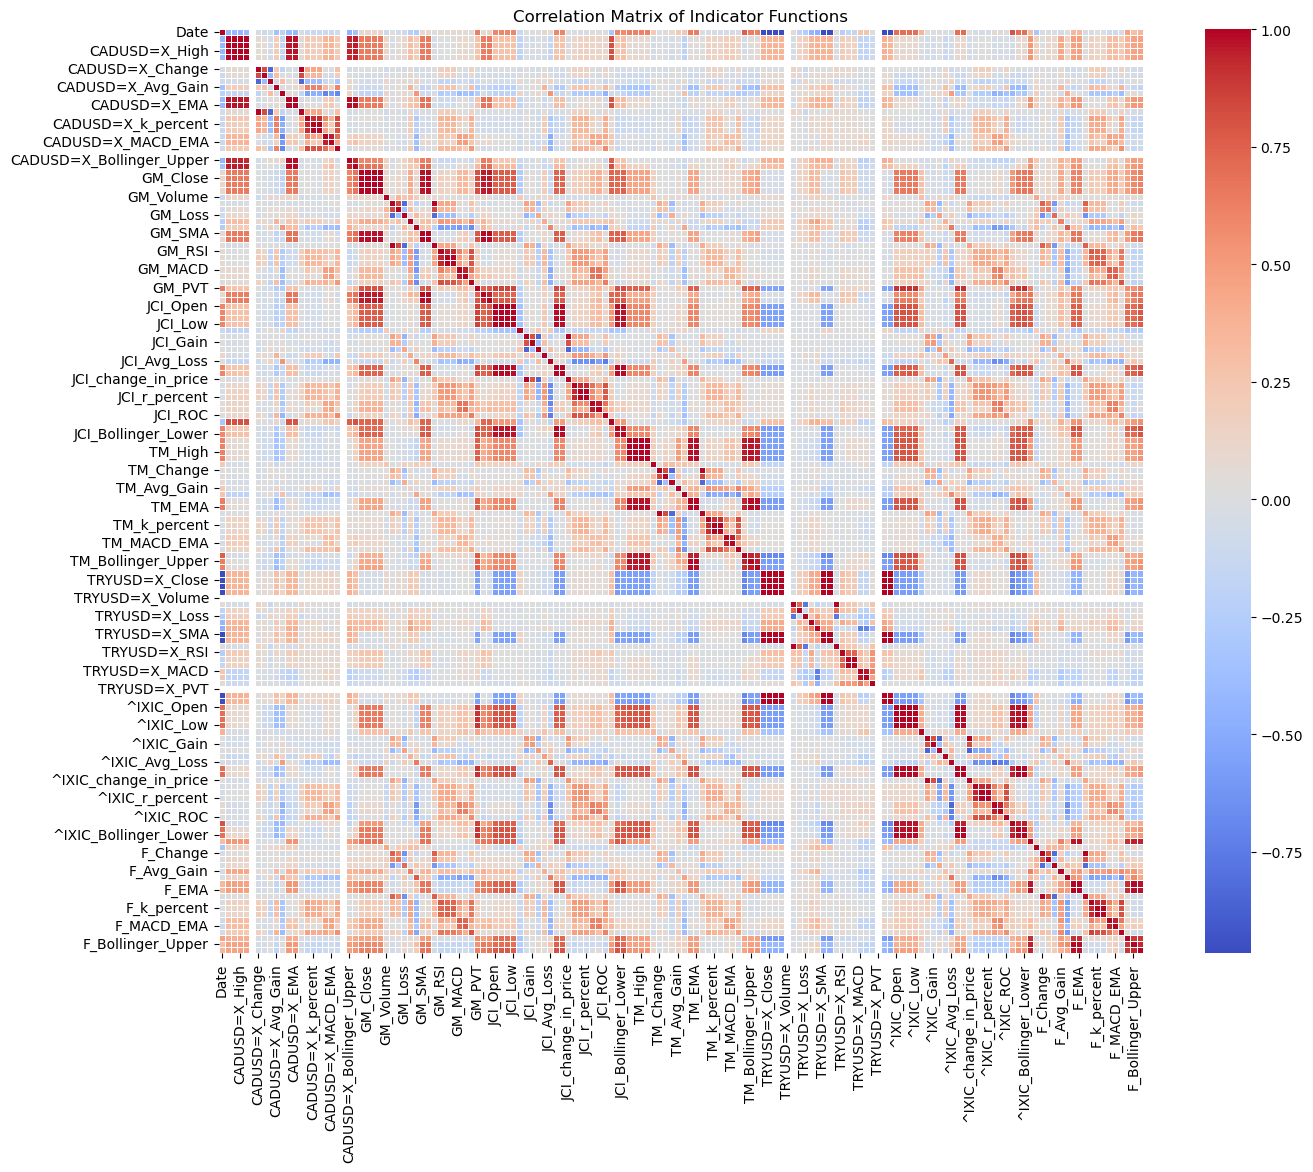

In [5]:
# Calculate the correlation matrix and visualize
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Indicator Functions')
plt.show()

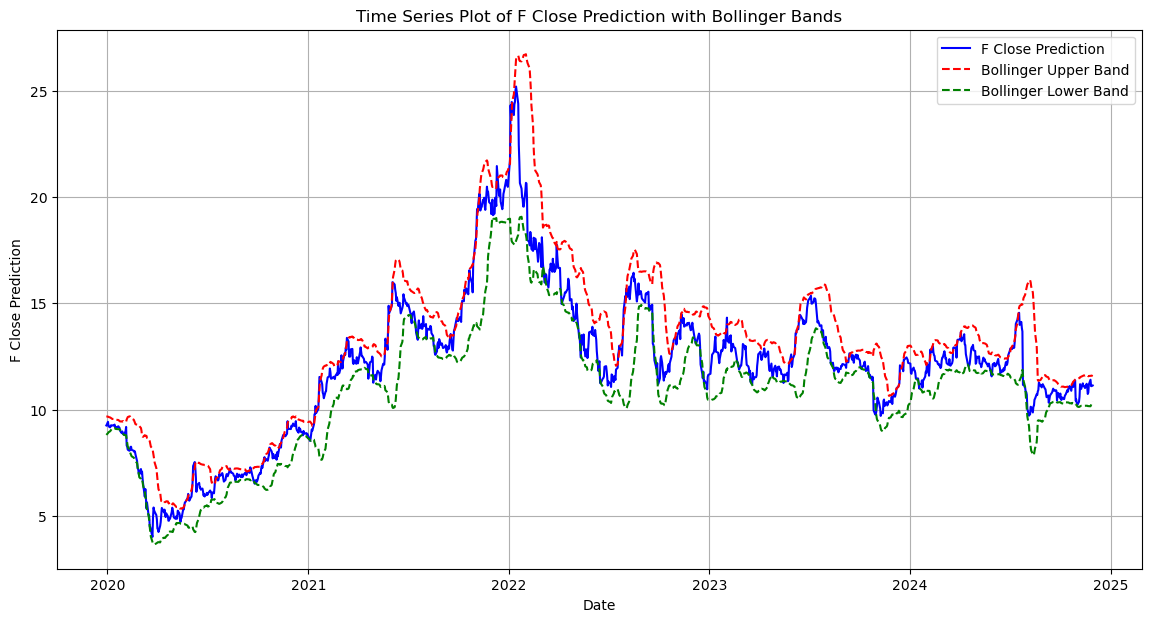

In [6]:
# Plot the time series for F_Close_pred with Bollinger Bands
plt.figure(figsize=(14, 7))

# Plot the predicted close prices
plt.plot(df['Date'], df['F_Close_pred'], label='F Close Prediction', color='blue')

# Plot Bollinger Bands
plt.plot(df['Date'], df['F_Bollinger_Upper'], label='Bollinger Upper Band', color='red', linestyle='--')
plt.plot(df['Date'], df['F_Bollinger_Lower'], label='Bollinger Lower Band', color='green', linestyle='--')

# Add titles and labels
plt.title('Time Series Plot of F Close Prediction with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('F Close Prediction')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error
import datetime


end_date = df['Date'].max()
start_date = end_date - pd.DateOffset(months=2)
df_last_2_months = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Step 2: Prepare features (X) and target (y)
X = df_last_2_months.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
y = df_last_2_months['F_Close_pred']

In [8]:
# Standardize and remove skewness
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
power_transformer = PowerTransformer()
#X_transformed = power_transformer.fit_transform(X_scaled)

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# Step 3: Split data - keep the last 1 week as an unseen test set
split_index = len(X) - 7
X_train_val, X_unseen_test = X[:split_index], X[split_index:]
y_train_val, y_unseen_test = y[:split_index], y[split_index:]

# Define models and parameter grids
ridge_params = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0]}
elastic_net_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0], 'model__l1_ratio': [0.2, 0.5, 0.8]}

# Define pipelines
ridge_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Apply scaling
    ('power', PowerTransformer()),  # Apply power transformation
    ('model', Ridge())
])

lasso_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('power', PowerTransformer()), 
    ('model', Lasso())
])

elastic_net_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('power', PowerTransformer()), 
    ('model', ElasticNet())
])

# TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV with TimeSeriesSplit
ridge_cv = GridSearchCV(ridge_pipeline, ridge_params, scoring='neg_mean_squared_error', cv=tscv)
lasso_cv = GridSearchCV(lasso_pipeline, lasso_params, scoring='neg_mean_squared_error', cv=tscv)
elastic_net_cv = GridSearchCV(elastic_net_pipeline, elastic_net_params, scoring='neg_mean_squared_error', cv=tscv)

# Fit models
ridge_cv.fit(X_train_val, y_train_val)
lasso_cv.fit(X_train_val, y_train_val)
elastic_net_cv.fit(X_train_val, y_train_val)

# Step 5: Collect MSE and best parameters for each model in a table
results = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'Best Parameters': [ridge_cv.best_params_, lasso_cv.best_params_, elastic_net_cv.best_params_],
    'Best MSE': [
        -ridge_cv.best_score_,  # Convert negative MSE back to positive
        -lasso_cv.best_score_,
        -elastic_net_cv.best_score_
    ]
})

# Display the table
print("Grid Search Results with MSE for Each Model:")
print(results)

# Step 5: Choose the best model based on the lowest MSE
best_model, best_mse = None, float('inf')
for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
    if -model_cv.best_score_ < best_mse:
        best_mse = -model_cv.best_score_
        best_model = model_cv.best_estimator_
print(f"Best model: {best_model}, MSE: {best_mse}")

Grid Search Results with MSE for Each Model:
        Model                                Best Parameters    Best MSE
0       Ridge                          {'model__alpha': 0.1}  279.505898
1       Lasso                          {'model__alpha': 1.0}    0.138350
2  ElasticNet  {'model__alpha': 1.0, 'model__l1_ratio': 0.2}    0.103080
Best model: Pipeline(steps=[('scaler', StandardScaler()), ('power', PowerTransformer()),
                ('model', ElasticNet(l1_ratio=0.2))]), MSE: 0.10307994277481829


In [14]:
# Step 5: Collect MSE, AIC, BIC, and AICc for each model in a table
results = []

for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
    best_model = model_cv.best_estimator_
    best_mse = -model_cv.best_score_

    # Fit the best model to the training and validation set
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('power', PowerTransformer()),
        ('model', best_model)
    ])
    pipeline.fit(X_train_val, y_train_val)

    # Predictions for AIC and BIC calculations
    y_pred_train = pipeline.predict(X_train_val)
    residuals = y_train_val - y_pred_train

    # Extract the model from the pipeline to access coefficients
    model = pipeline.named_steps['model']

    # Calculate number of parameters (p) for AIC/BIC
    if hasattr(model, 'coef_'):
        p = np.sum(model.coef_ != 0) + 1  # Count non-zero coefficients and intercept
    else:
        p = len(model.get_params())  # For models like ElasticNet without direct coef_ attribute

    # Calculate AIC, BIC, and AICc
    n = len(y_train_val)  # Sample size
    sse = np.sum(residuals**2)

    aic = n * np.log(sse / n) + 2 * p
    bic = n * np.log(sse / n) + p * np.log(n)
    aicc = aic + (2 * p * (p + 1)) / (n - p - 1)

    # Store results in a dictionary
    results.append({
        'Model': name,
        'Best Parameters': model_cv.best_params_,
        'Best MSE': best_mse,
        'AIC': aic,
        'BIC': bic,
        'AICc': aicc
    })

# Convert results list to DataFrame for display
results_df = pd.DataFrame(results)

# Display the table
print("Grid Search Results with MSE, AIC, BIC, and AICc for Each Model:")
print(results_df)

Grid Search Results with MSE, AIC, BIC, and AICc for Each Model:
        Model                                Best Parameters    Best MSE  \
0       Ridge                          {'model__alpha': 0.1}  279.505898   
1       Lasso                          {'model__alpha': 1.0}    0.138350   
2  ElasticNet  {'model__alpha': 1.0, 'model__l1_ratio': 0.2}    0.103080   

          AIC         BIC        AICc  
0 -473.319303 -441.100944 -420.819303  
1  -42.709443   -7.269249   29.576272  
2  -58.734463  -21.683351   26.188614  


Unseen Test MSE: 0.0862346963060375


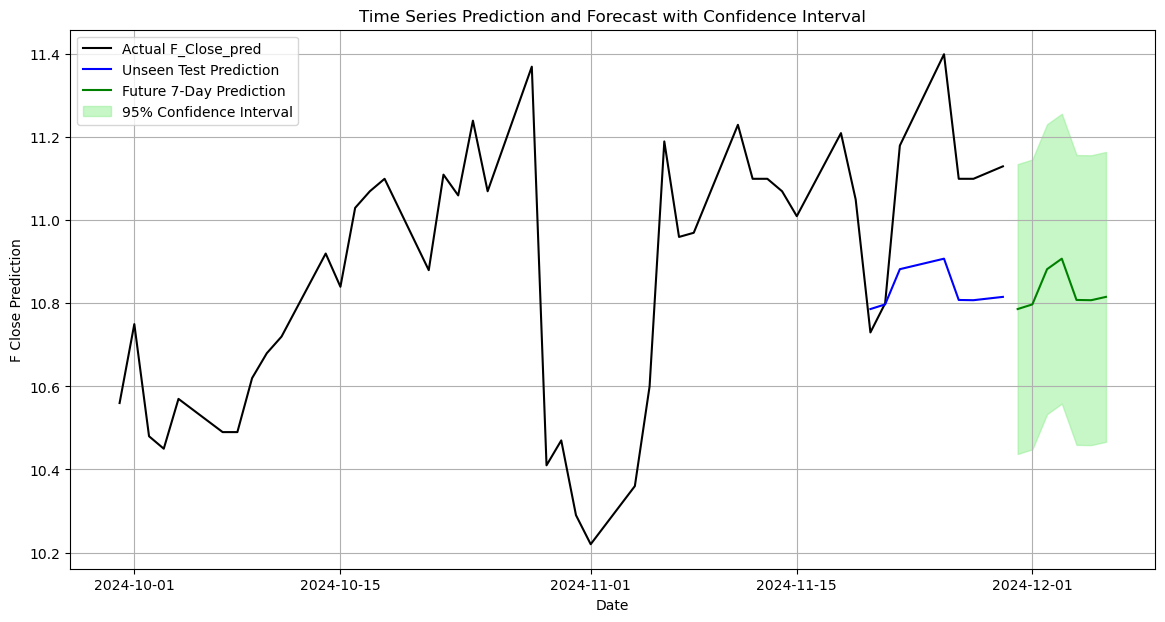

In [16]:
# Step 1: Define the preprocessing pipeline
final_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

# Step 2: Fit the pipeline on the training + validation set
X_train_val_processed = final_pipeline.fit_transform(X_train_val)

# Step 3: Fit the best model on the processed training + validation set
best_model.fit(X_train_val_processed, y_train_val)

# Step 1: Process the unseen test set with the same preprocessing pipeline
X_unseen_test_processed = final_pipeline.transform(X_unseen_test)

# Step 2: Predict on the unseen test set
y_unseen_pred = best_model.predict(X_unseen_test_processed)

# Step 3: Evaluate the predictions
mse_unseen = mean_squared_error(y_unseen_test, y_unseen_pred)
print(f"Unseen Test MSE: {mse_unseen}")

# Step 4: Use the last week of training data for forecasting
future_7_days = final_pipeline.transform(X[-7:])  # Use the pipeline to transform the last 7 days of features
future_predictions = best_model.predict(future_7_days)

# Step 5: Calculate confidence intervals for future predictions
std_dev = np.std(y_unseen_pred - y_unseen_test)  # Standard deviation of residuals from unseen test
upper_bound = future_predictions + (1.96 * std_dev)  # 95% confidence interval upper bound
lower_bound = future_predictions - (1.96 * std_dev)  # 95% confidence interval lower bound

# Step 6: Plot the results
plt.figure(figsize=(14, 7))

# Actual observed data
plt.plot(df_last_2_months['Date'], y, label="Actual F_Close_pred", color='black')

# Predictions on the unseen test set
plt.plot(df_last_2_months['Date'].iloc[-7:], y_unseen_pred, label="Unseen Test Prediction", color='blue')

# Future forecast for the next 7 days
future_dates = pd.date_range(df_last_2_months['Date'].iloc[-1] + pd.Timedelta(days=1), periods=7)
plt.plot(future_dates, future_predictions, label="Future 7-Day Prediction", color='green')

# Confidence intervals for future predictions
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")

# Plot formatting
plt.xlabel("Date")
plt.ylabel("F Close Prediction")
plt.title("Time Series Prediction and Forecast with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()

## Backtesting

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Function to perform 5 backtests without data leakage
def perform_backtesting_with_metrics(df, best_model, num_tests=5, window_size_months=2, test_days=7):
    """
    Perform backtesting with a fixed number of tests, ensuring no data leakage during preprocessing.
    """
    backtest_results = []
    start_idx = 0
    total_data_points = len(df)

    scaler = StandardScaler()
    power_transformer = PowerTransformer()

    for i in range(num_tests):
        # Calculate start and end indices for training and testing
        train_start_idx = start_idx
        train_end_idx = start_idx + window_size_months * 30  # Approx. 30 days per month
        test_start_idx = train_end_idx
        test_end_idx = test_start_idx + test_days

        # Ensure we don't exceed data range
        if test_end_idx > total_data_points:
            break

        # Prepare the training and testing datasets
        train_data = df.iloc[train_start_idx:train_end_idx]
        test_data = df.iloc[test_start_idx:test_end_idx]

        # Features and target for training
        X_train = train_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_train = train_data['F_Close_pred']

        # Features and target for testing
        X_test = test_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_test = test_data['F_Close_pred']

        # Preprocess the training and testing data
        X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform only on the training data
        X_train_transformed = power_transformer.fit_transform(X_train_scaled)
        X_test_scaled = scaler.transform(X_test)  # Transform the test data with training scalers
        X_test_transformed = power_transformer.transform(X_test_scaled)

        # Train the best model on the training data
        best_model.fit(X_train_transformed, y_train)

        # Make predictions on the test data
        y_pred = best_model.predict(X_test_transformed)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append results to backtest_results
        backtest_results.append({
            'Train Start': train_data['Date'].iloc[0],
            'Train End': train_data['Date'].iloc[-1],
            'Test Start': test_data['Date'].iloc[0],
            'Test End': test_data['Date'].iloc[-1],
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2
        })

        # Move the window forward by the test period
        start_idx += test_days

    return backtest_results

# Perform 5 backtests
backtest_results = perform_backtesting_with_metrics(df, best_model, num_tests=5)

# Convert results to a DataFrame and display
backtest_results_df = pd.DataFrame(backtest_results)
print("Backtesting Results with MSE, RMSE, and R²:")
print(backtest_results_df)

# Calculate average metrics across all backtests
average_mse = backtest_results_df['MSE'].mean()
average_rmse = backtest_results_df['RMSE'].mean()
average_r2 = backtest_results_df['R²'].mean()

print(f"\nAverage MSE: {average_mse:.4f}")
print(f"Average RMSE: {average_rmse:.4f}")
print(f"Average R²: {average_r2:.4f}")

Backtesting Results with MSE, RMSE, and R²:
                Train Start                 Train End  \
0 2019-12-30 00:00:00+00:00 2020-03-25 00:00:00+00:00   
1 2020-01-09 00:00:00+00:00 2020-04-03 00:00:00+00:00   
2 2020-01-21 00:00:00+00:00 2020-04-15 00:00:00+00:00   
3 2020-01-30 00:00:00+00:00 2020-04-24 00:00:00+00:00   
4 2020-02-10 00:00:00+00:00 2020-05-05 00:00:00+00:00   

                 Test Start                  Test End       MSE      RMSE  \
0 2020-03-26 00:00:00+00:00 2020-04-03 00:00:00+00:00  1.196998  1.094074   
1 2020-04-06 00:00:00+00:00 2020-04-15 00:00:00+00:00  0.104502  0.323268   
2 2020-04-16 00:00:00+00:00 2020-04-24 00:00:00+00:00  0.165601  0.406941   
3 2020-04-27 00:00:00+00:00 2020-05-05 00:00:00+00:00  0.055796  0.236211   
4 2020-05-06 00:00:00+00:00 2020-05-14 00:00:00+00:00  0.082964  0.288034   

          R²  
0  -6.884303  
1  -0.326788  
2 -11.742537  
3  -0.812030  
4  -2.173974  

Average MSE: 0.3212
Average RMSE: 0.4697
Average R²: -4.387

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import pandas as pd
import numpy as np


def rolling_backtesting_limited(df, num_backtests=5, window_size_months=2, test_days=7):
    """
    Perform a limited number of rolling backtests (e.g., 5 iterations) with proper handling of preprocessing within cross-validation.
    """
    backtest_results = []
    start_idx = 0
    total_data_points = len(df)
    backtest_count = 0  # To count the number of backtests performed

    while (
        start_idx + window_size_months * 30 + test_days <= total_data_points
        and backtest_count < num_backtests
    ):
        # Calculate start and end indices for training and testing
        train_start_idx = start_idx
        train_end_idx = train_start_idx + window_size_months * 30
        test_start_idx = train_end_idx
        test_end_idx = test_start_idx + test_days

        # Prepare the training and testing datasets
        train_data = df.iloc[train_start_idx:train_end_idx]
        test_data = df.iloc[test_start_idx:test_end_idx]

        # Features and target for training
        X_train = train_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_train = train_data['F_Close_pred']

        # Features and target for testing
        X_test = test_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_test = test_data['F_Close_pred']

        # Define pipelines for models
        ridge_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('transformer', PowerTransformer()),
            ('model', Ridge())
        ])
        lasso_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('transformer', PowerTransformer()),
            ('model', Lasso())
        ])
        elastic_net_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('transformer', PowerTransformer()),
            ('model', ElasticNet())
        ])

        # Define parameter grids
        ridge_params = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}
        lasso_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0]}
        elastic_net_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0], 'model__l1_ratio': [0.2, 0.5, 0.8]}

        # Perform cross-validation using GridSearchCV
        tscv = TimeSeriesSplit(n_splits=5)

        ridge_cv = GridSearchCV(ridge_pipeline, ridge_params, scoring='neg_mean_squared_error', cv=tscv)
        lasso_cv = GridSearchCV(lasso_pipeline, lasso_params, scoring='neg_mean_squared_error', cv=tscv)
        elastic_net_cv = GridSearchCV(elastic_net_pipeline, elastic_net_params, scoring='neg_mean_squared_error', cv=tscv)

        # Fit models on training data
        ridge_cv.fit(X_train, y_train)
        lasso_cv.fit(X_train, y_train)
        elastic_net_cv.fit(X_train, y_train)

        # Find the best model for this training set
        best_model, best_mse = None, float('inf')
        for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
            if -model_cv.best_score_ < best_mse:
                best_mse = -model_cv.best_score_
                best_model = model_cv.best_estimator_

        # Train the best model on the entire training data
        best_model.fit(X_train, y_train)

        # Transform the test set and make predictions
        y_pred = best_model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append results to backtest_results
        backtest_results.append({
            'Train Start': train_data['Date'].iloc[0],
            'Train End': train_data['Date'].iloc[-1],
            'Test Start': test_data['Date'].iloc[0],
            'Test End': test_data['Date'].iloc[-1],
            'Best Model': str(best_model),
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2
        })

        # Increment the counter and move the window forward by the test period
        backtest_count += 1
        start_idx += test_days

    return pd.DataFrame(backtest_results)


# Perform 5 rolling backtests
backtest_results_5_df = rolling_backtesting_limited(df, num_backtests=5)

# Display results
print("Rolling Backtesting Results (5 Iterations):")
print(backtest_results_5_df)

# Calculate average metrics across the 5 backtests
average_mse = backtest_results_5_df['MSE'].mean()
average_rmse = backtest_results_5_df['RMSE'].mean()
average_r2 = backtest_results_5_df['R²'].mean()

print(f"\nAverage MSE (5 Backtests): {average_mse:.4f}")
print(f"Average RMSE (5 Backtests): {average_rmse:.4f}")
print(f"Average R² (5 Backtests): {average_r2:.4f}")


/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e-02, tolerance: 5.103e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.574e-03, tolerance: 5.103e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

Rolling Backtesting Results (5 Iterations):
                Train Start                 Train End  \
0 2019-12-30 00:00:00+00:00 2020-03-25 00:00:00+00:00   
1 2020-01-09 00:00:00+00:00 2020-04-03 00:00:00+00:00   
2 2020-01-21 00:00:00+00:00 2020-04-15 00:00:00+00:00   
3 2020-01-30 00:00:00+00:00 2020-04-24 00:00:00+00:00   
4 2020-02-10 00:00:00+00:00 2020-05-05 00:00:00+00:00   

                 Test Start                  Test End  \
0 2020-03-26 00:00:00+00:00 2020-04-03 00:00:00+00:00   
1 2020-04-06 00:00:00+00:00 2020-04-15 00:00:00+00:00   
2 2020-04-16 00:00:00+00:00 2020-04-24 00:00:00+00:00   
3 2020-04-27 00:00:00+00:00 2020-05-05 00:00:00+00:00   
4 2020-05-06 00:00:00+00:00 2020-05-14 00:00:00+00:00   

                                          Best Model       MSE      RMSE  \
0  Pipeline(steps=[('scaler', StandardScaler()),\...  0.429965  0.655717   
1  Pipeline(steps=[('scaler', StandardScaler()),\...  0.040864  0.202148   
2  Pipeline(steps=[('scaler', StandardScal

/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.305e-02, tolerance: 9.749e-03
  model = cd_fast.enet_coordinate_descent(


/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e-02, tolerance: 5.103e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.574e-03, tolerance: 5.103e-03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/envs/equity_vs_commodity/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

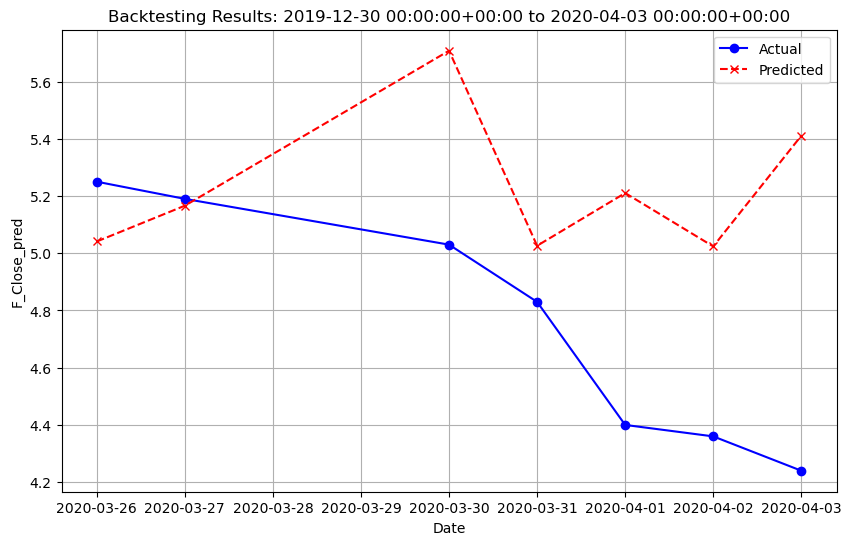

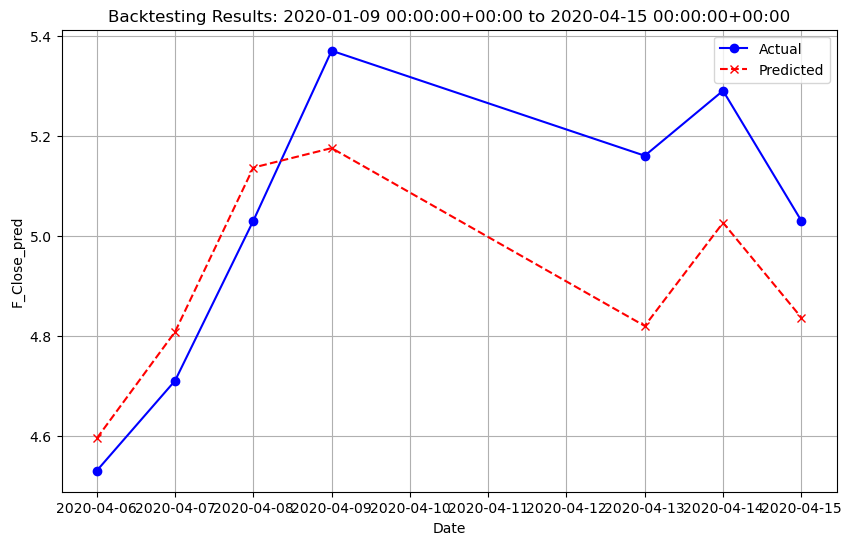

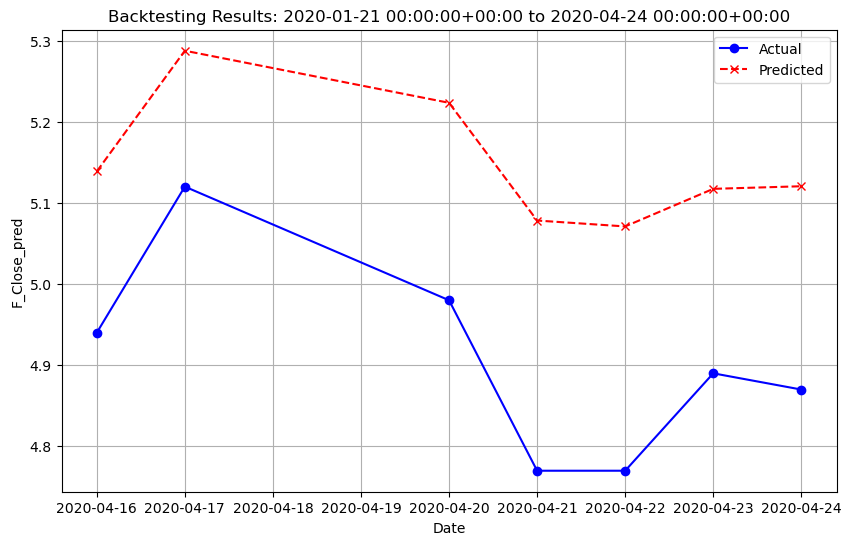

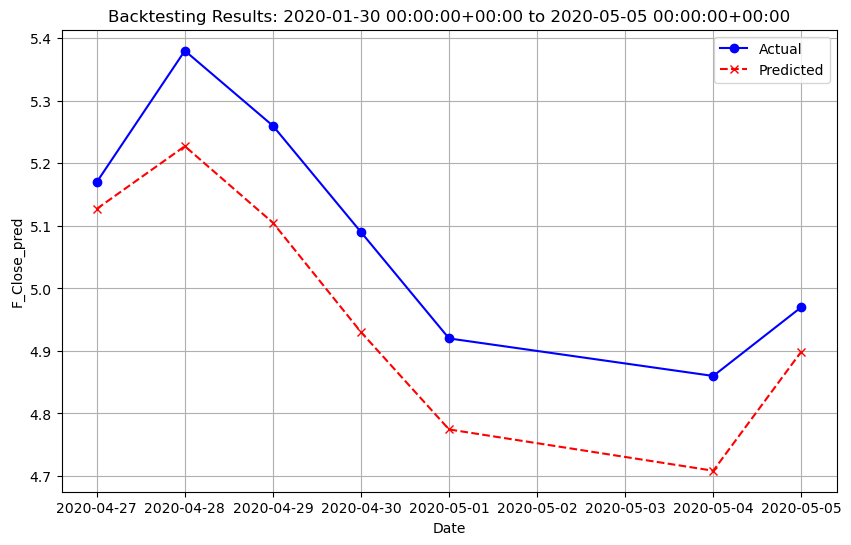

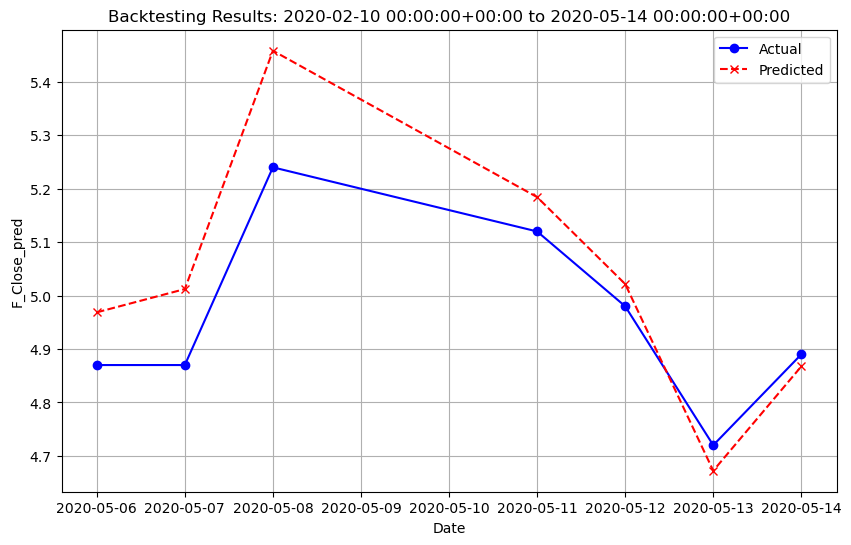

In [21]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PowerTransformer

def plot_backtesting_results(backtest_results, df):
    """
    Plot fitted model predictions vs real data for each backtest.
    """
    for idx, row in backtest_results.iterrows():
        # Extract the test period
        test_start = row['Test Start']
        test_end = row['Test End']

        # Filter the actual data for the test period
        test_data = df[(df['Date'] >= test_start) & (df['Date'] <= test_end)]
        y_test = test_data['F_Close_pred'].values

        # Extract predictions for the test period
        y_pred = row['Predictions']

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(test_data['Date'], y_test, label='Actual', marker='o', linestyle='-', color='blue')
        plt.plot(test_data['Date'], y_pred, label='Predicted', marker='x', linestyle='--', color='red')
        plt.title(f"Backtesting Results: {row['Train Start']} to {row['Test End']}")
        plt.xlabel('Date')
        plt.ylabel('F_Close_pred')
        plt.legend()
        plt.grid(True)
        plt.show()

def rolling_backtesting_with_predictions(df, num_backtests=5, window_size_months=2, test_days=7):
    """
    Perform rolling backtesting and include predictions for plotting.
    """
    backtest_results = []
    start_idx = 0
    total_data_points = len(df)
    backtest_count = 0  # To count the number of backtests performed

    while (
        start_idx + window_size_months * 30 + test_days <= total_data_points
        and backtest_count < num_backtests
    ):
        # Calculate start and end indices for training and testing
        train_start_idx = start_idx
        train_end_idx = train_start_idx + window_size_months * 30
        test_start_idx = train_end_idx
        test_end_idx = test_start_idx + test_days

        # Prepare the training and testing datasets
        train_data = df.iloc[train_start_idx:train_end_idx]
        test_data = df.iloc[test_start_idx:test_end_idx]

        # Features and target for training
        X_train = train_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_train = train_data['F_Close_pred']

        # Features and target for testing
        X_test = test_data.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
        y_test = test_data['F_Close_pred']

        # Define pipelines for models
        ridge_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('transformer', PowerTransformer()),
            ('model', Ridge())
        ])
        lasso_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('transformer', PowerTransformer()),
            ('model', Lasso())
        ])
        elastic_net_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('transformer', PowerTransformer()),
            ('model', ElasticNet())
        ])

        # Define parameter grids
        ridge_params = {'model__alpha': [0.1, 1.0, 10.0, 100.0]}
        lasso_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0]}
        elastic_net_params = {'model__alpha': [0.01, 0.1, 1.0, 10.0], 'model__l1_ratio': [0.2, 0.5, 0.8]}

        # Perform cross-validation using GridSearchCV
        tscv = TimeSeriesSplit(n_splits=5)

        ridge_cv = GridSearchCV(ridge_pipeline, ridge_params, scoring='neg_mean_squared_error', cv=tscv)
        lasso_cv = GridSearchCV(lasso_pipeline, lasso_params, scoring='neg_mean_squared_error', cv=tscv)
        elastic_net_cv = GridSearchCV(elastic_net_pipeline, elastic_net_params, scoring='neg_mean_squared_error', cv=tscv)

        # Fit models on training data
        ridge_cv.fit(X_train, y_train)
        lasso_cv.fit(X_train, y_train)
        elastic_net_cv.fit(X_train, y_train)

        # Find the best model for this training set
        best_model, best_mse = None, float('inf')
        for model_cv, name in [(ridge_cv, 'Ridge'), (lasso_cv, 'Lasso'), (elastic_net_cv, 'ElasticNet')]:
            if -model_cv.best_score_ < best_mse:
                best_mse = -model_cv.best_score_
                best_model = model_cv.best_estimator_

        # Train the best model on the training data
        best_model.fit(X_train, y_train)

        # Transform the test data using the same pipeline
        y_pred = best_model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append results to backtest_results
        backtest_results.append({
            'Train Start': train_data['Date'].iloc[0],
            'Train End': train_data['Date'].iloc[-1],
            'Test Start': test_data['Date'].iloc[0],
            'Test End': test_data['Date'].iloc[-1],
            'Best Model': str(best_model),
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2,
            'Predictions': y_pred
        })

        # Increment the counter and move the window forward by the test period
        backtest_count += 1
        start_idx += test_days

    return pd.DataFrame(backtest_results)

# Perform rolling backtesting and collect predictions
backtest_results_with_predictions = rolling_backtesting_with_predictions(df, num_backtests=5)

# Plot the results
plot_backtesting_results(backtest_results_with_predictions, df)


## For manual calculation of accuracy

In [207]:
# 1 day forecast
Reg_acc_1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# 2 days forecast
Reg_acc_2 = [1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]
# 3 days forecast
Reg_acc_3 = [0.666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# 4 days forecast
Reg_acc_4 = [0.75, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# 5 days forecast
Reg_acc_5 = [0.8, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [208]:
# 1 day forecast
PReg_acc_1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# 2 days forecast
PReg_acc_2 = [1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0]
# 3 days forecast
PReg_acc_3 = [1.0, 1.0, 0.666667, 1.0, 1.0, 1.0, 1.0, 0.666667, 1.0, 1.0]
# 4 days forecast
PReg_acc_4 = [1.0, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0]
# 5 days forecast
PReg_acc_5 = [1.0, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0]

In [209]:
# 1 day forecast
XReg_acc_1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# 2 days forecast
XReg_acc_2 = [1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0]
# 3 days forecast
XReg_acc_3 = [1.0, 1.0, 0.666667, 1.0, 1.0, 1.0, 1.0, 0.666667, 1.0, 1.0]
# 4 days forecast
XReg_acc_4 = [1.0, 0.75, 0.75, 1.0, 1.0, 0.75, 1.0, 0.75, 1.0, 1.0]
# 5 days forecast
XReg_acc_5 = [1.0, 0.6, 0.8, 1.0, 1.0, 0.8, 1.0, 0.8, 1.0, 1.0]

In [210]:
# 1 day forecast
PXReg_acc_1 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# 2 days forecast
PXReg_acc_2 = [1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0]
# 3 days forecast
PXReg_acc_3 = [1.0, 1.0, 0.666667, 1.0, 1.0, 1.0, 1.0, 0.666667, 1.0, 1.0]
# 4 days forecast
PXReg_acc_4 = [1.0, 0.75, 0.75, 1.0, 1.0, 0.75, 1.0, 0.75, 1.0, 1.0]
# 5 days forecast
PXReg_acc_5 = [1.0, 0.6, 0.8, 1.0, 1.0, 0.8, 1.0, 0.8, 1.0, 1.0]